<a href="https://colab.research.google.com/github/alkhf11/UTS_ML/blob/main/Drugs(Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import file dataset
dataframe = pd.read_csv('/content/drive/MyDrive/ML/drug200.csv')

#menampilkan info dari dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [2]:
#menampilkan 5 baris pertama dari dataframe
dataframe.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


UBAH DATA MENJADI NUMERIK

In [3]:
from sklearn.preprocessing import LabelEncoder

dataframe_int = dataframe.copy()

encoder = LabelEncoder()

categorical_data = ['Sex', 'BP', 'Cholesterol', 'Drug']

for kolom in categorical_data:
  dataframe_int[kolom] = encoder.fit_transform(dataframe[kolom])

dataframe_int.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [4]:
for kolom in categorical_data:
  print(kolom,dataframe_int[kolom].unique())

Sex [0 1]
BP [0 1 2]
Cholesterol [0 1]
Drug [0 3 4 1 2]


In [5]:
for kolom in categorical_data:
  print(kolom,dataframe[kolom].unique())

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


ANALISIS MATRIX KORELASI

In [6]:
dataframe_int.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


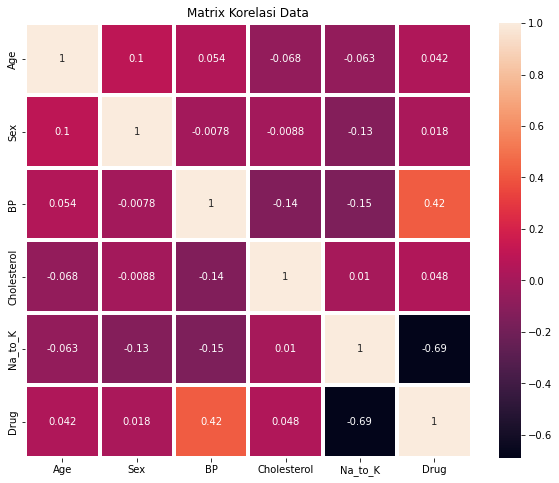

In [7]:
plt.figure(figsize=(10,8))
plt.title('Matrix Korelasi Data')
sns.heatmap(dataframe_int.corr(),annot=True, linewidths=3)
plt.show()

MEMISAHKAN DATA

In [8]:
# Memisahkan dataframe awal menjadi data dan label
data = dataframe_int.drop('Drug',axis=1)
label = dataframe_int['Drug']

# Memisahkan dataframe menjadi data latihan dan data tes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

# Print dataframe.shape untuk mengetahui bentuk dataframe
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


(RANDOM FOREST)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
#membuat prediksi terhadap data tes
prediction = rfc.predict(x_test)
prediction

array([4, 0, 0, 3, 0, 1, 0, 4, 0, 4, 0, 4, 4, 1, 0, 2, 3, 3, 4, 4, 4, 0,
       0, 0, 1, 4, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 4])

In [11]:
#menampilkan akurasi prediksi model
rfc.score(x_test, y_test)

0.975

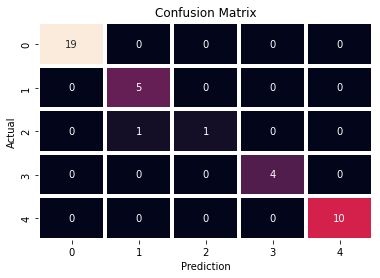

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
# Membuat funsi untuk menampilkan confusion matrix dengan seaborn dan matplotlib
def display_conf(y_test,prediction):
    sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3,cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

# Memanggil fungsi untuk menampilkan visualisasi confusion matrix
display_conf(y_test,prediction)

In [13]:
print(f'R2 Score : {r2_score(y_test,prediction)}')
print('Classification Report :')
print(classification_report(y_test,prediction))

R2 Score : 0.991377452037077
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.97      0.90      0.92        40
weighted avg       0.98      0.97      0.97        40

